In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from random import randint

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import (Dense, Activation, SeparableConv2D, MaxPooling2D, Flatten, Dropout, 
                          BatchNormalization)
from keras.optimizers import Adam

import imgaug
from imgaug import augmenters as iaa
from imgaug.augmentables.kps import Keypoint, KeypointsOnImage

from preprocess import load, generator
from utils import plot_labelled_image, plot_labelled_sample, plot_loss, load_model, save_model
from model import MyModel

Using TensorFlow backend.


In [3]:
images_path = '../data/images/'
labels_path = '../data/landmarks.csv'
target_size = 80

In [15]:
X, y = load(images_path, labels_path)

X_train, X_test_, y_train, y_test_ = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_, y_test_, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(4192, 80, 80, 3) (898, 80, 80, 3) (899, 80, 80, 3)


In [17]:
y.head()

,0_x,0_y,1_x,1_y,2_x,2_y,3_x,3_y,4_x,4_y,...,6_x,6_y,7_x,7_y,8_x,8_y,9_x,9_y,10_x,10_y
filename,,,,,,,,,,,,,,,,,,,,,
Abyssinian_1.jpg,45.200001,26.199999,45.200001,15.599999,50.666664,20.200001,55.866665,15.400000,55.599998,26.199999,...,48.266670,24.400002,52.266663,24.600000,48.800003,29.799999,49.733334,28.800001,51.333332,29.799999
Abyssinian_100.jpg,31.675127,31.680000,38.375633,16.320000,49.746193,20.000000,67.005074,12.640000,65.786804,28.800001,...,46.294418,30.720001,59.492386,29.600000,51.370560,40.639999,55.634518,39.200001,59.289341,40.000000
Abyssinian_102.jpg,15.200000,40.430107,4.480000,13.763441,31.359999,18.580645,50.720001,5.677419,50.879997,32.860214,...,25.280001,36.129032,40.159996,34.580647,28.800001,52.989250,33.919998,50.580643,38.880001,51.440857
Abyssinian_103.jpg,42.880001,37.606838,38.880001,23.019943,48.320000,23.475782,56.639999,16.182335,57.760002,32.592590,...,47.519997,35.555557,53.920002,33.732193,50.720001,43.988605,52.160000,43.304844,54.080002,42.849003
Abyssinian_105.jpg,40.159996,36.480000,38.239998,22.613333,48.800003,22.613333,59.360001,22.613333,57.119999,35.840000,...,45.120003,38.826668,52.480003,38.826668,46.880001,47.786667,48.639999,47.573334,50.400002,48.000000


In [43]:
y['left'] = y[y.columns[y.columns.str.endswith('x')]].min(axis=1).values
y['right'] = y[y.columns[y.columns.str.endswith('x')]].max(axis=1).values
y['top'] = y[y.columns[y.columns.str.endswith('y')]].min(axis=1).values
y['bottom'] = y[y.columns[y.columns.str.endswith('y')]].max(axis=1).values

In [44]:
box_labels = y[['left', 'top', 'right', 'bottom']]

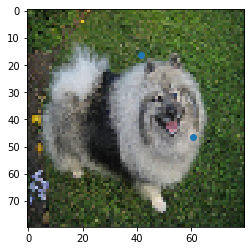

In [49]:
plot_labelled_image(X[3000], box_labels.iloc[3000], 80, False)